In [44]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [45]:
svpath_ns = "../../Data/NASA_kepler/mps_saves/legendreNN2_ns_d12_chi35.jld2";
dloc =  "../../Data/NASA_kepler/datasets/KeplerLightCurves_C2_C4.jld2";

In [46]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")[:, 1:200]
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")[:, 1:200]
    y_test = read(f, "y_test")
close(f)

In [47]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 427 training samples and 185 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 60

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [49]:
class = 0
interp_sites = collect(100:150)
instance_idx = 55
stats, p1_ns = any_interpolate_median(fc_ns, class, instance_idx, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true)

(Dict(:MAE => 2.3241950334011676e-5, :NN_MAE => 1.6829999348260256e-5), Plots.Plot{Plots.GRBackend}[Plot{Plots.GRBackend() n=4}])

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 2.3242e-5 │
│ NN_MAE │  1.683e-5 │
╰────────┴───────────╯


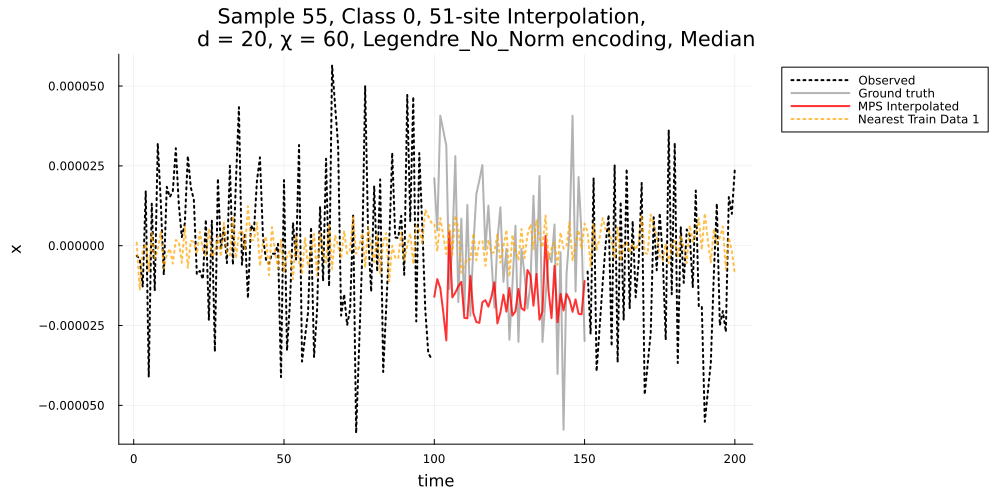

In [50]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)